In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.ndimage as sim

def linfit(x,y):
    n=len(x)
    sx=sum(x)
    sy=sum(y)
    sxy=sum(x*y)
    sxx=sum(x**2)
    
    a=(sx*sxy-sy*sxx)/(sx**2-n*sxx)
    b=(sx*sy-n*sxy)/(sx**2-n*sxx)
    
    return a,b

def rsquared(x,y,yfit):
    ymean=np.mean(y)
    sstot=sum((y-ymean)**2)
    ssres=sum((y-yfit)**2)
    rs=1-ssres/sstot
    return rs

# function powerfit
# input data sets x and y
# output fit constants A, n, and coefficient of determination
# fit would be y=Ax^n

def powerfit(x,y):
    mod_y=np.log(y)
    mod_x=np.log(x)
    a,b=linfit(mod_x,mod_y)
    return np.exp(a),b,rsquared(x,y,np.exp(a)*x**b)

(101, 401)

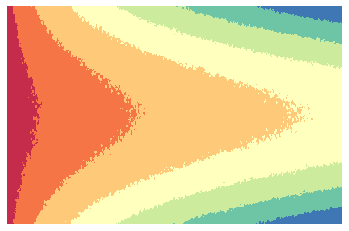

In [27]:
x = np.loadtxt('channeldata.csv',delimiter=',')
plt.contourf(x,cmap='Spectral')
plt.axis('off')
ny,nx = x.shape
xx = np.linspace(0,4,nx)
yy = np.linspace(0,1,ny)
x.shape

(0.0, 400.0, 0.0, 99.0)

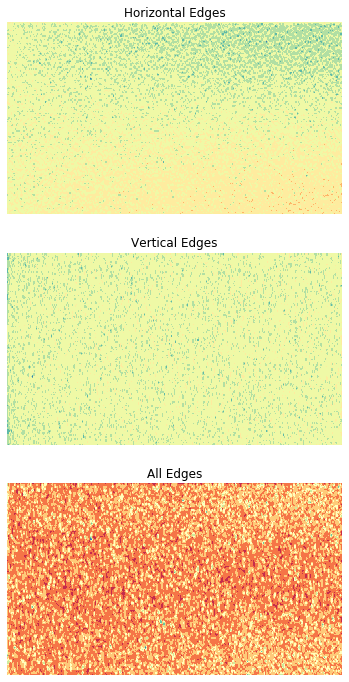

In [28]:
#This should hopefully detect the vertical and horizontal edges or a combination of both.
x1 = pd.read_csv('channeldata.csv')
x = x1.copy()
Dx= [[1,0],[-1,0]]
Dy= [[1,-1], [0,0]]

Gx = sim.convolve(x,Dx)
Gy = sim.convolve(x,Dy)
GG_totaledge = np.sqrt(Gx**2 + Gy**2)

plt.figure(figsize=(6,12))
plt.subplot(3,1,1)
plt.contourf(Gx,cmap='Spectral')
plt.title('Horizontal Edges')
plt.axis('off')

# The vertical edges
plt.subplot(3,1,2)
plt.contourf(Gy,cmap='Spectral')
plt.title('Vertical Edges')
plt.axis('off')



# All edges that were detected
plt.subplot(3,1,3)
plt.contourf(GG_totaledge,cmap='Spectral')
plt.title('All Edges')
plt.axis('off')

In [29]:
#B:channel = np.loadtxt('channeldata.csv',delimiter=',')
channel = np.loadtxt('channeldata.csv',delimiter=',')
mean_channel = np.mean(channel, axis=0)
powerfit(xx[1:], mean_channel[1:])

(0.6785387879468003, 0.499876389679529, 0.999964135252378)

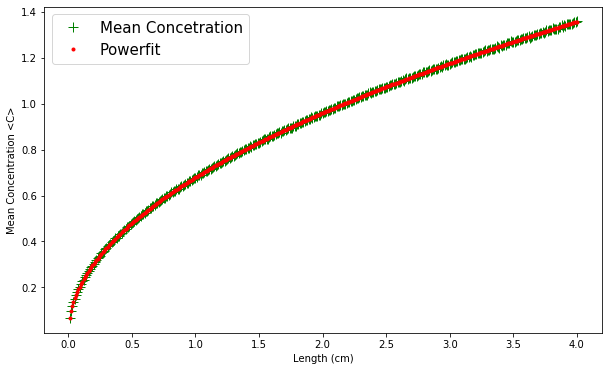

In [30]:
#Constants from the powerfit
A = 0.6785387879468003
n = 0.499876389679529

fit = lambda x: A*x**(n)

plt.figure(figsize=(10,6))

plt.plot(xx[1:],mean_channel[1:],'g+',markersize=10, label="Mean Concetration")
plt.plot(xx[1:], fit(xx[1:]),'ro', markersize=3, label="Powerfit")
plt.legend()
plt.legend(loc=2, prop={'size': 15})
plt.ylabel("Mean Concentration <C>")
plt.xlabel("Length (cm)")
plt.show()

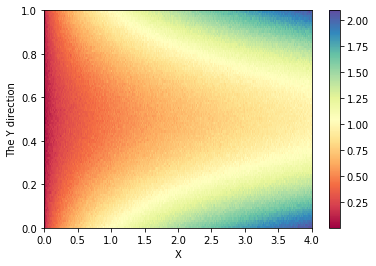

In [31]:
# (C) The Gradient of the file.
x = np.loadtxt('channeldata.csv',delimiter=',')
ny,nx = x.shape
xx = np.linspace(0,4,nx)
yy = np.linspace(0,1,ny)
plt.pcolormesh(xx,yy,x,cmap='Spectral')# I think this is how it's meant to look
plt.xlabel('X')
plt.ylabel('The Y direction')
plt.colorbar()
#plt.axis('off')

In [35]:
xn = np.linspace(0,4,nx)
yn = np.linspace(0,1,ny)

In [36]:
#x derivatives
xd = xn[1]-xn[0]
dCdx = np.zeros(x.shape)

#First point
dCdx[:,0]= (-3*x[:,0] +4*x[:,1]- x[:,2])/(2*xd)
#Last point
dCdx[:,-1]= (3*x[:,-1] -4*x[:,-2] + x[:,-3])/(2*xd)

#All other columns
dCdx[:,1:-1]=(x[:,2:]-x[:,:-2])/(2*xd)

In [37]:
#Y Derivatives 
yd = yn[1] - yn[0]
dCdy = np.zeros(x.shape)

#The first point
dCdy[0,:] = (-3*x[0,:] +4*x[1,:]- x[2,:])/(2*yd)
#The last point
dCdy[-1,:]= (3*x[-1,:]-4*x[-2,:] + x[-3,:])/(2*yd)
#All other vectorized points
dCdy[1:-1,:] = (x[2:,:] -x[:-2,:])/(2*yd)

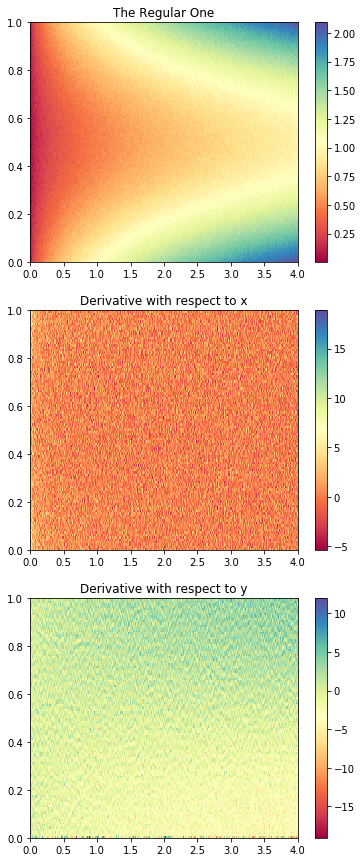

In [38]:
k = 1
x_n, y_n = np.meshgrid(xn,yn)
#X&Y are done
xd = xn[1]-xn[0]
dx = k*dCdx
dy = k*dCdy
#The plots

plt.figure(figsize=(6,15))
plt.subplot(311)
plt.pcolormesh(xx,yy,x,cmap='Spectral')
plt.title('The Regular One')
plt.colorbar()


plt.subplot(312)
plt.pcolormesh(xx,yy,dx,cmap='Spectral')
plt.title('Derivative with respect to x')
plt.colorbar()

plt.subplot(313)
plt.pcolormesh(xx,yy,dy,cmap='Spectral')
plt.title('Derivative with respect to y')
plt.colorbar()

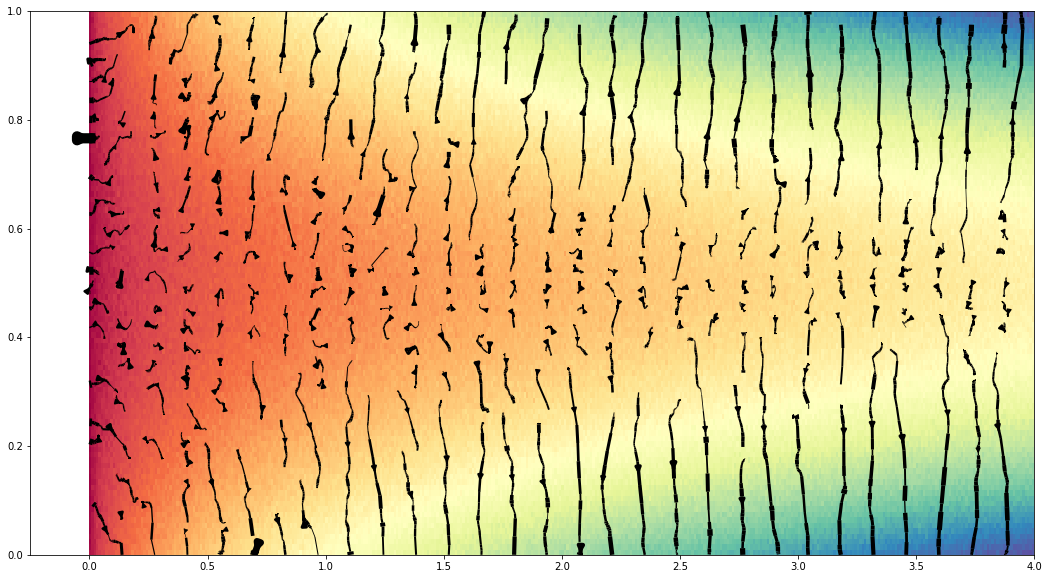

In [39]:
#dding a streamplot to see how this goes
#Uncomment the bottom and run it.
sqrxy = (dx**2 +dy**2)**(1/2)
plt.figure(figsize=(18,10))
plt.pcolormesh(xx,yy,x,cmap ='Spectral')
plt.streamplot(x_n,y_n,dx,dy,linewidth=1*sqrxy,color='k')
plt.show()


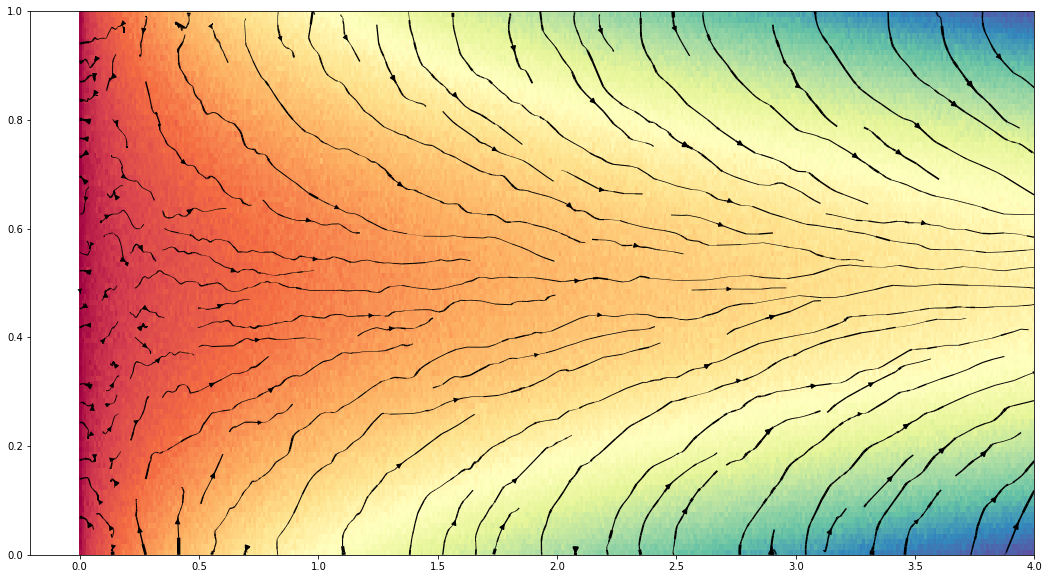

In [40]:
#D
sqrxy = (dx**2 +dy**2)**(1/2)
plt.figure(figsize=(18,10))
plt.pcolormesh(xx,yy,x,cmap ='Spectral')
plt.streamplot(x_n,y_n,dx*(-0.1)+((4*y_n)*(1-y_n)*x),dy*(-0.1),linewidth=0.5*sqrxy,color='k')
plt.colorbar
plt.show()

In [41]:
# My attempt at (E)
#It's below. In all honesty, I don't think this is right. I did this on Sunday
#Let's Do this
#I'm not sure this is what he meant. I did something I guess.
#I knew it this is wrong.
def trapz(y,x):
    # determine spacing array
    h=x[1]-x[0]
    
    # sum of h x non-end points
    I=sum(h*y[1:-1])
    
    # add one-half h x end points
    I+=(y[0]+y[-1])*h/2
    
    return I


Text(0, 0.5, 'Vertical(y) Distance 100(cm)')

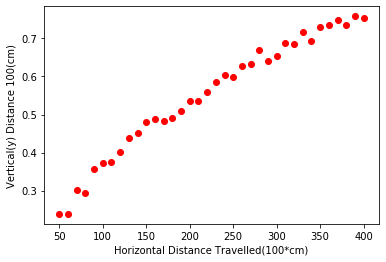

In [42]:
#This is (E)
#We can use Newton Law of approximation to find where the y point hits the x horizontal.
# That's the length of the channel
# That was quick


x22 = np.arange(50,401,10)
#Representing the sum
qx = dx*(-0.1)+((4*y_n)*(1-y_n)*x)
t=[]
for i in range(len(x22)):   
    t1=trapz(qx[:,x22[i]],yy)
    t.append(t1)
plt.plot(x22,t,'ro')
plt.xlabel('Horizontal Distance Travelled(100*cm)')
plt.ylabel('Vertical(y) Distance 100(cm)')


In [43]:
#Q(x)= -D*dx*y + 2*y**2 - (4/3)*y**3
